# SET UP

In [5]:
import sys
sys.path.append('./src')

%load_ext autoreload
%autoreload 2

%pip install -r requirements.txt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/fb/b1/b16836310f6ca89ddfb30fe65f8851c1a8d63152190ed740a236eca15012/statsmodels-0.14.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/4e/56/6f5e3a16954726b335ccaf31cc34823405a92428f76dc0a989698af6d8bc/arch-7.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 16.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 17.4 MB/s eta 0:00:00
Note: you may 

In [6]:
# import garden
import pandas as pd
import numpy as np
# from bibds import data

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# GRANGER
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# CONTAGION
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from arch import arch_model

# GRANGER

## <font color='#fce500'>Import data</font>

In [3]:
# compi =
# wpi =
# syntec =

Resolving access token for scope "https://storage.azure.com/.default" using identity of type "MANAGED".
Getting data access token with Assigned Identity (client_id=7fc81106-eb62-42dc-8121-75cb5fe29f5e) and endpoint type based on configuration


## <font color='#fce500'>Data preparation</font>

,date,syntec,cpi,wpi
0,2019-12-01,274.7,100.951219,100.065488
1,2019-12-01,274.7,100.951219,99.325681
2,2020-01-01,274.7,100.844286,99.225333
3,2020-01-01,274.7,100.844286,98.376522
4,2020-02-01,274.4,100.705111,98.717956


<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    112 non-null    datetime64[ns]
 1   syntec  112 non-null    float64       
 2   cpi     112 non-null    float64       
 3   wpi     112 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.4 KB


None

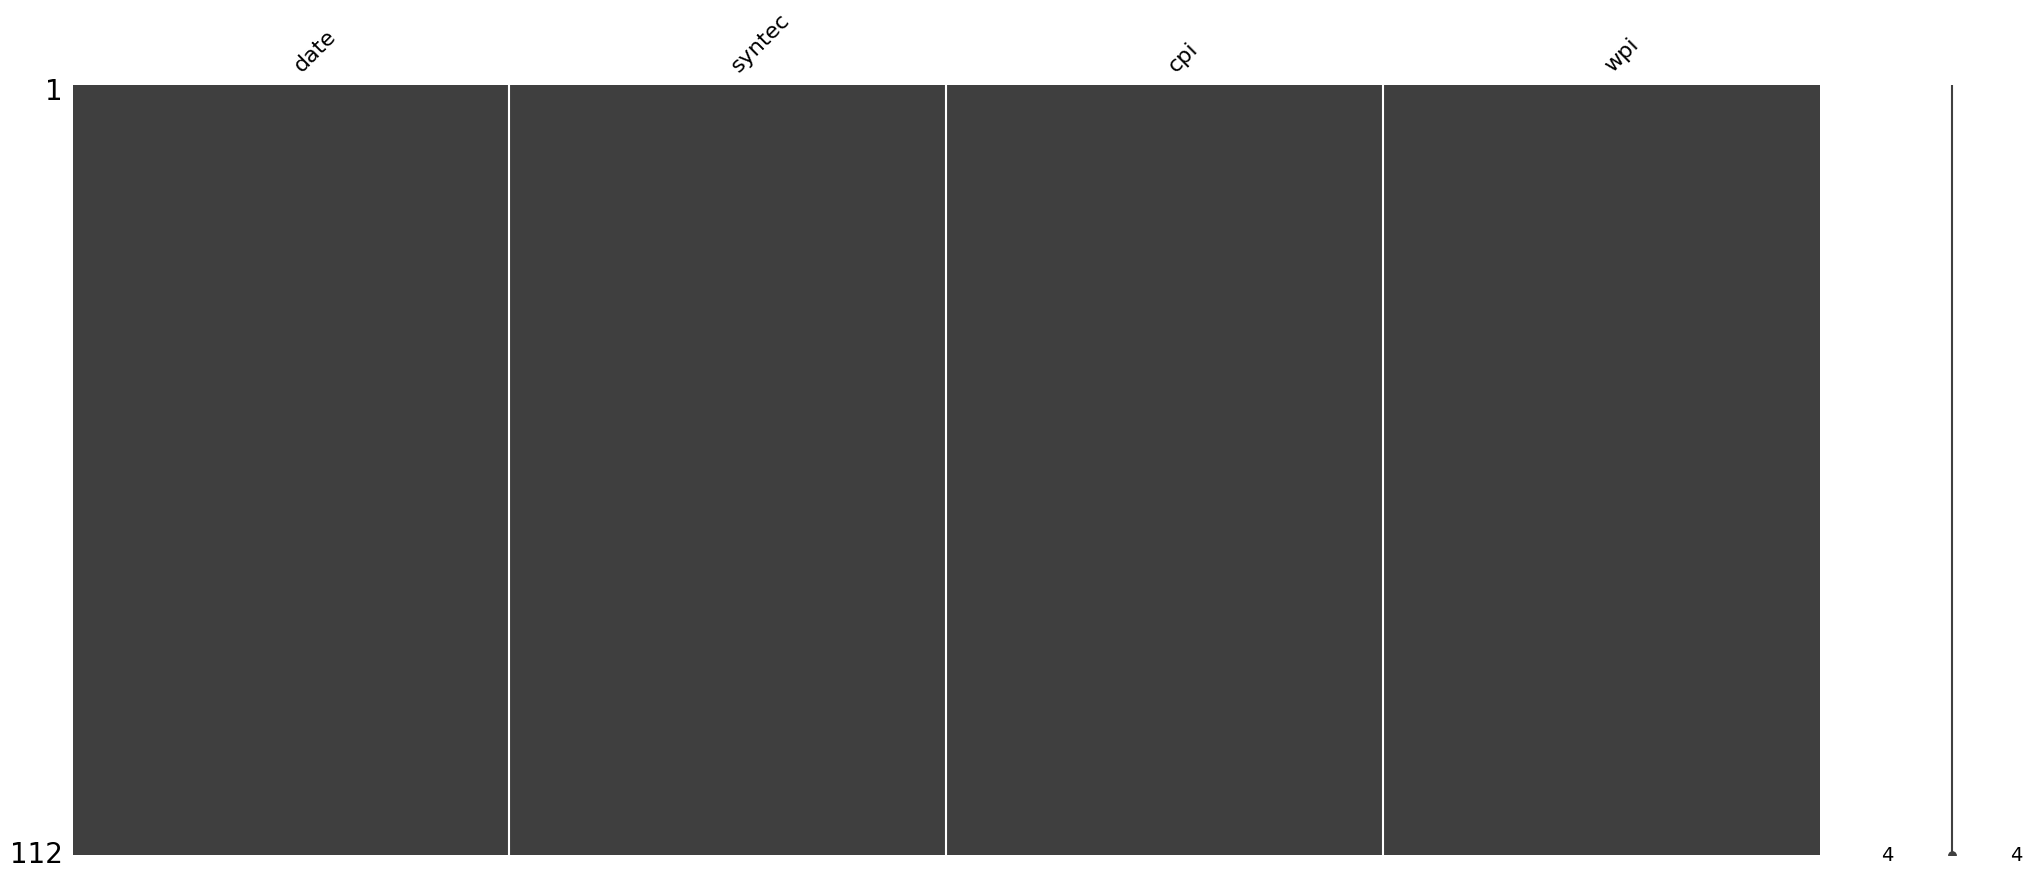

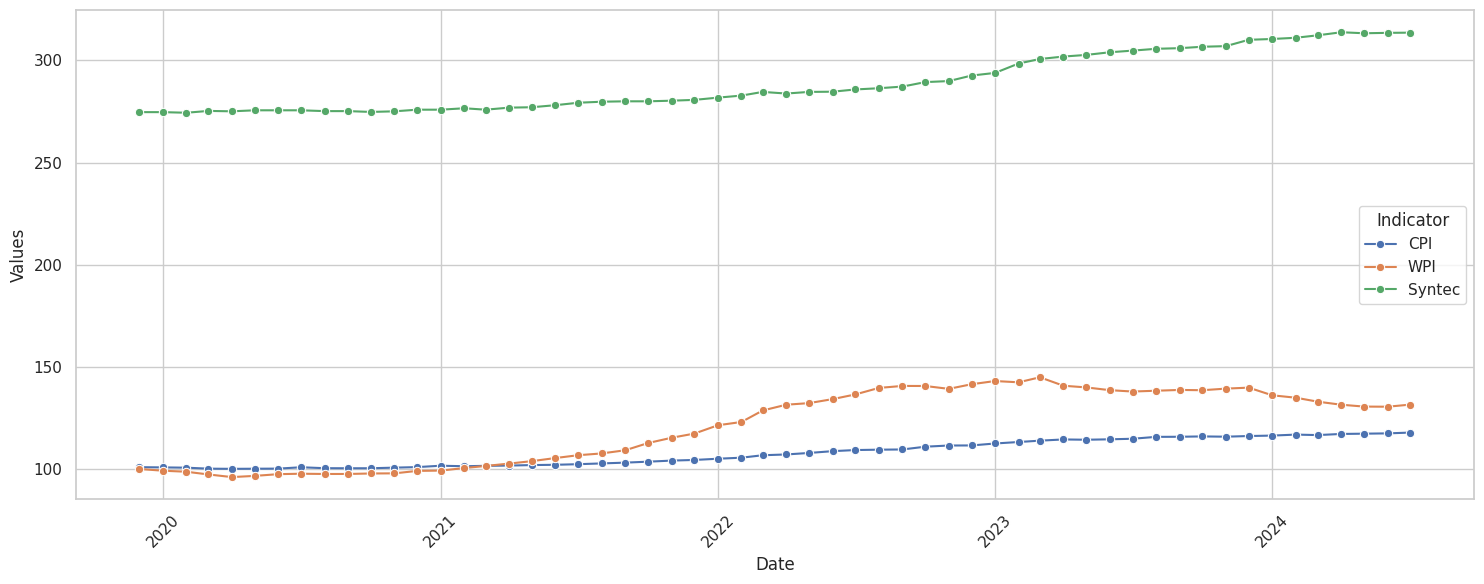

In [ ]:
# # tye formating
# cpi['date'] = pd.to_datetime(cpi['date'])
# wpi['date'] = pd.to_datetime(wpi['date'])

# cpi['value'] = cpi['value'].astype('float64')
# wpi['value'] = wpi['value'].astype('float64')

# # Data selection
# cpi_ = cpi[(~cpi["economic_concept_name"].str.contains(pat="Dollar", case=False)) & 
#           (~cpi["economic_concept_name"].str.contains(pat="NSA", case=False)) & 
#           (cpi['unit_name'] == 'Index') & 
#           (cpi["series_type_name"] == "Global - Monthly Forecast Update") & 
#           (cpi['source_geographic_location_name'] == 'France')][['date', 'value']].copy().rename(columns={"value": "cpi"})

# wpi_ = wpi[(~wpi["economic_concept_name"].str.contains(pat="Dollar", case=False)) & 
#           (~wpi["economic_concept_name"].str.contains(pat="NSA", case=False)) & 
#           (wpi['unit_name'] == 'Index') & 
#           (wpi["series_type_name"] == "Global - Monthly Forecast Update") & 
#           (wpi['source_geographic_location_name'] == 'France')][['date', 'value']].copy().rename(columns={"value": "wpi"})

# syntec_ = syntec[['date', 'syntec']].merge(cpi_, how='left', on='date').merge(wpi_, how='left', on='date').dropna()


# garden.debug_plot(syntec_)

# plt.figure(figsize=(15, 6))
# sns.set(style="whitegrid")
# sns.lineplot(data=syntec, x='date', y='cpi', marker='o', label='CPI')
# sns.lineplot(data=syntec, x='date', y='wpi', marker='o', label='WPI')
# sns.lineplot(data=syntec, x='date', y='syntec', marker='o', label='Syntec')
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.legend(title='Indicator')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## <font color='#fce500'>Granger Test</font>

### <font color='#a4d65e'>Context:</font>

The Granger causality test is a statistical hypothesis test for determining whether one time series can predict another time series. It's not about true causality in the philosophical or deterministic sense, but rather about predictive causality, which means that past values of one time series contain information that helps predict future values of another series.


### <font color='#a4d65e'>Goal:</font>

The goal of the Granger causality test is to ascertain whether the inclusion of past values of one time series can improve the prediction accuracy of another time series compared to a model that does not include these past values.


### <font color='#a4d65e'>Use Cases:</font>

1. **Economics and Finance**:
   - To determine if one economic indicator (e.g., interest rates) can predict another (e.g., inflation rates).
   - To investigate the relationship between stock prices and economic indicators.


2. **Environmental Science**:
   - To analyze if past values of a weather variable (e.g., temperature) can predict another variable (e.g., precipitation).


3. **Neuroscience**:
   - To explore if the activity in one region of the brain can predict the activity in another region.


4. **Marketing and Social Media**:
   - To check if historical advertising expenditure can predict future sales.
   - To see if social media sentiment can predict stock prices or sales.


### <font color='#a4d65e'>Underlying Process:</font>

The Granger causality test involves the following steps:

1. **Model Specification**:
   - Consider two time series: $X_t$ (the target series) and $Y_t$ (the reference series).
   - Fit two models:
     1. A model that uses only the past values of $X_t$ to predict $X_t$.
     2. A model that uses the past values of both $X_t$ and $Y_t$ to predict $X_t$.


2. **Model Fitting**:
   - Fit the following models:
     1. **Unrestricted Model** (with lagged values of both series):
        
        $X_t = a_0 + a_1X_{t-1} + a_2X_{t-2} + \ldots + a_pX_{t-p} + b_1Y_{t-1} + b_2Y_{t-2} + \ldots + b_qY_{t-q} + \epsilon_t$

     2. **Restricted Model** (with lagged values of the target series only):
        
        $X_t = c_0 + c_1X_{t-1} + c_2X_{t-2} + \ldots + c_pX_{t-p} + \eta_t$


3. **Hypothesis Testing**:
   - Null Hypothesis ($H_0$): The lagged values of $Y_t$ do not improve the prediction of $X_t$ (i.e., $ b_1 = b_2 = \ldots = b_q = 0 $).
   - Alternative Hypothesis ($H_1$): The lagged values of $Y_t$ do improve the prediction of $X_t$.


4. **Statistical Tests**:
   - Compute the sum of squared residuals for both models (SSR\_unrestricted and SSR\_restricted).
   - Calculate the F-statistic to test the null hypothesis:
     
     $F = \frac{(SSR_{restricted} - SSR_{unrestricted}) / q}{SSR_{unrestricted} / (n - p - q - 1)}$
     
     where $n$ is the number of observations, $p$ is the number of lags in the restricted model, and $q$ is the number of lags of $Y_t$.

   - Determine the p-value from the F-distribution. If the p-value is below a chosen significance level (e.g., 0.05), reject the null hypothesis.

The function bellow test whether the syntec index in granger-caused by the CPI.

In [8]:
# granger_test = garden.granger_test(syntec_['syntec'], syntec_['cpi'], verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.2158 , p=0.0011  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=11.5274 , p=0.0007  , df=1
likelihood ratio test: chi2=10.9673 , p=0.0009  , df=1
parameter F test:         F=11.2158 , p=0.0011  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.3286 , p=0.0000  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=27.9265 , p=0.0000  , df=2
likelihood ratio test: chi2=24.8865 , p=0.0000  , df=2
parameter F test:         F=13.3286 , p=0.0000  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0083  , p=0.0008  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=19.2618 , p=0.0002  , df=3
likelihood ratio test: chi2=17.7371 , p=0.0005  , df=3
parameter F test:         F=6.0083  , p=0.0008  , df_denom=102, df_num=3


/home/azureuser/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


The Granger causality test results indicate that the first time series (e.g., rubber index) Granger-causes the second time series (e.g., syntec, CPI, WPI) at lags 1, 2, and 3. The test statistics are significant for all lags, suggesting a robust causal relationship. This means that past values of the first time series contain information that helps predict the second time series beyond the information contained in the past values of the second time series alone.

# CONTAGION

Contemporary literature, particularly in econometrics, strives to deepen our understanding of the interactions between various time series to uncover the underlying mechanisms of economic phenomena, such as financial crises. For example, we now have a clearer look of the relationships between stock markets and inflation rates.

**Correlation** refers to a <u>statistical relationship between two variables, where changes in one variable are associated with changes in the other</u>. However, correlation does not imply that one variable causes the other to change; it simply indicates that they move together in some way.

**Causality**, on the other hand, implies a <u>cause-and-effect relationship, where one variable directly influences or causes a change in another</u>. Establishing causality requires more than just observing a correlation; it often involves understanding the underlying mechanisms and using specific methods, like Granger causality tests, to determine if one variable truly drives changes in another.

In this context, <a href="https://www.sciencedirect.com/science/article/pii/S1544612324005336">Burak Sencer Atasoy and Ibrahim Özkan introduced an innovative approach in 2024 (PDF in documentation section)</a> that enhances the robustness of analyzing such interactions. Their method combines correlation and causality analysis to analyse the contagion across time series, offering a more consistent and comprehensive framework for understanding the intricate relationships within economic data.

## <font color='#fce500'>Steps</font>

The contagion test proposed in the article works by integrating two key components: dynamic conditional correlations (DCC) and time-varying Granger causality (TVGC). The goal is to accurately detect and distinguish financial contagion from mere interconnectedness. Here’s how each component functions within the contagion test:

### 1. **Dynamic Conditional Correlations (DCC)**
   - **Purpose:** Measure the time-varying correlations between different time series to identify periods of increased co-movement.
   - **Method:** Use a model like DCC-GARCH, which accounts for changing volatility in the data. This model can estimate how correlations between time series evolve over time.
   - **Application:** Calculate the conditional correlations at each time point. Identify periods where correlations significantly exceed the historical trend, signaling potential contagion.

### 2. **Time-Varying Granger Causality (TVGC)**
   - **Purpose:** Distinguish between mere correlation and actual causality, where one time series influences another.
   - **Method:** Apply a time-varying Granger causality test to assess whether past values of one time series can predict future values of another. This helps establish a causal link.
   - **Application:** Identify periods when the causality test indicates a statistically significant causal relationship, suggesting that contagion may be present.

### 3. **Constructing the Contagion Metric**
   - **Integration:** Combine the results from the DCC and TVGC models. Specifically, look for periods where both a significant increase in correlations and a causal relationship are detected.
   - **Metric:** Develop a contagion metric that takes a value of "1" when both conditions are met (indicating contagion) and "0" otherwise. This metric helps distinguish contagion from simple interconnectedness.

## <font color='#fce500'>Data preparation</font>

We will test this method on a tangible example: let's study the potential contagion of raw material price increase on the Michelin stock price along the past four years.

In [4]:
verbose = True

,date,rubber,rubber_pct
0,1990-01,37.730000,NaN
1,1990-02,38.680000,2.517892
2,1990-03,37.580002,-2.843843
3,1990-04,38.009998,1.144216
4,1990-05,38.750000,1.946861


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   date        415 non-null    period[M]
 1   rubber      415 non-null    float64  
 2   rubber_pct  414 non-null    float64  
dtypes: float64(2), period[M](1)
memory usage: 9.9 KB


None

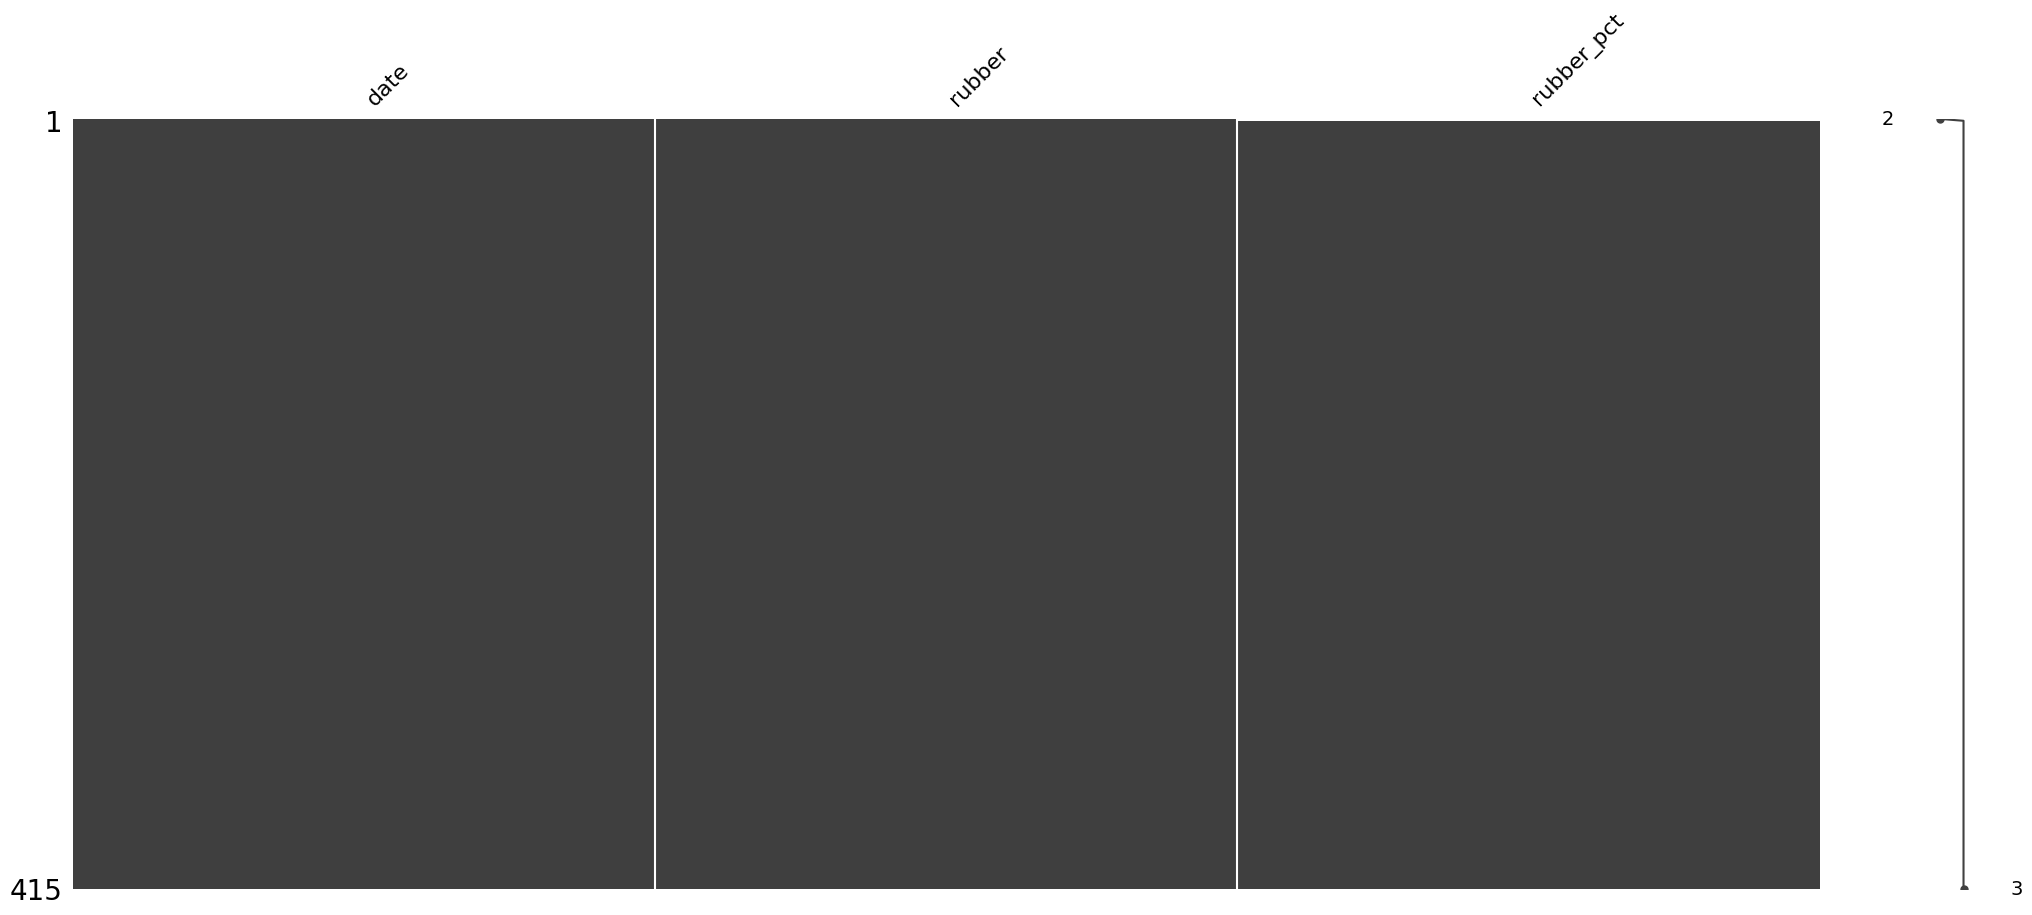

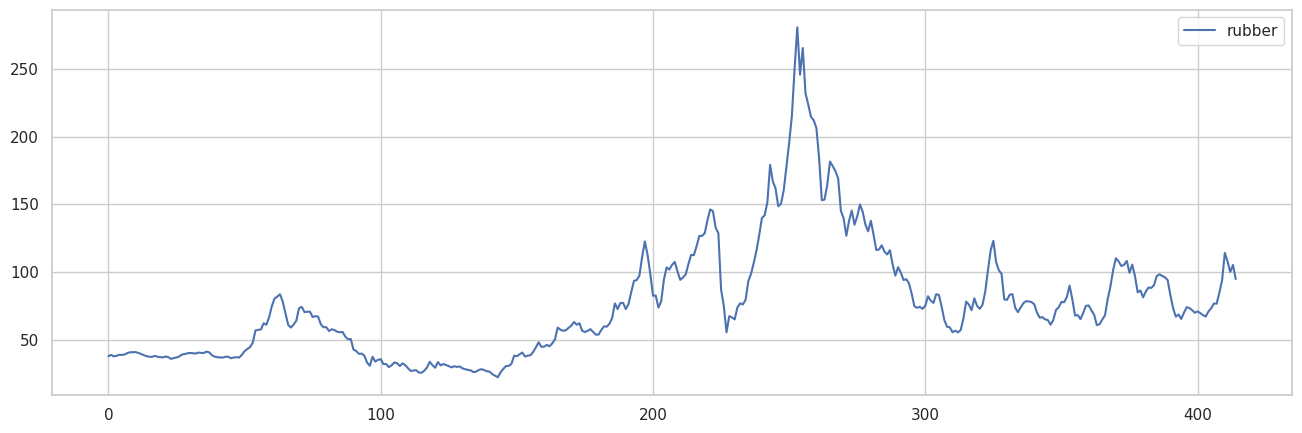

In [5]:
# IMPORTING
rubber_path = "./data/rubber.csv" # Federal reserve Bank of St. louis: https://fred.stlouisfed.org/series/PRUBBUSDM
rubber = pd.read_csv(rubber_path)

# FORMATING
rubber.rename(columns={'DATE':'date', 'PRUBBUSDM':'rubber'}, inplace=True)
rubber['date'] = pd.to_datetime(rubber['date']).dt.to_period('M')
rubber['rubber_pct'] = 100 * rubber['rubber'].pct_change().dropna()

# Debug
if verbose:
    garden.debug_plot(rubber)
    garden.lineplot_large(rubber[['rubber']])

,date,stock,stock_pct
0,2000-01,4.408097,NaN
1,2000-02,4.026835,-8.649114
2,2000-03,3.800950,-5.609498
3,2000-04,4.151925,9.233863
4,2000-05,4.307571,3.748768


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   date       296 non-null    period[M]
 1   stock      296 non-null    float64  
 2   stock_pct  295 non-null    float64  
dtypes: float64(2), period[M](1)
memory usage: 7.1 KB


None

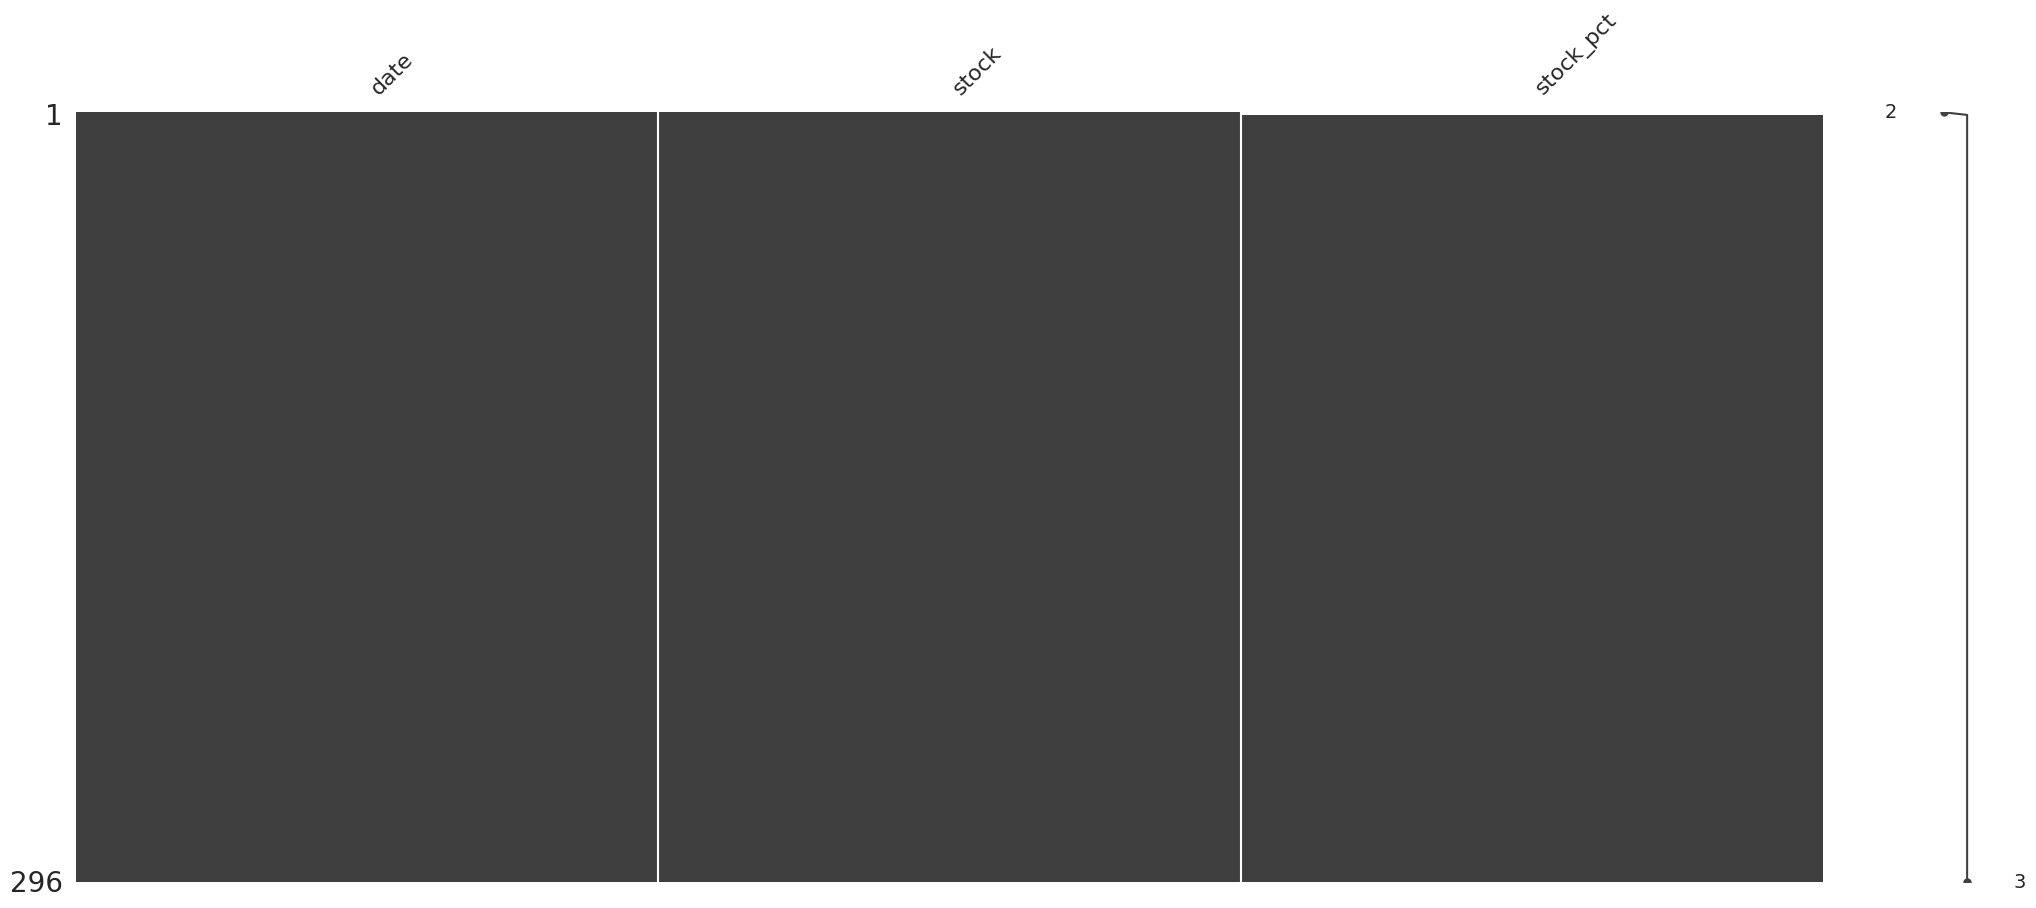

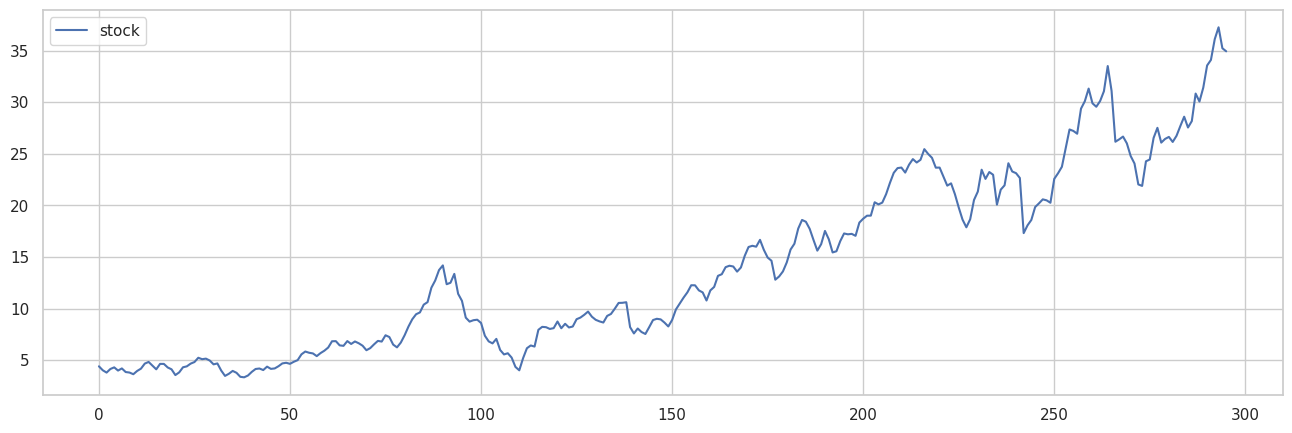

In [6]:
# IMPORTING
stock_path = "./data/stock.csv" # Yahoo Finance: https://finance.yahoo.com/quote/ML.PA/history/?period1=946886400&period2=1725024861
stock = pd.read_csv(stock_path)

if verbose: # check correlation between close value and adjusted close value
    stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# FORMATING
stock.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
stock.rename(columns={'Date':'date', 'Adj Close':'stock'}, inplace=True)
stock['date'] = pd.to_datetime(stock['date'])

stock['date'] = stock['date'].dt.to_period('M')
stock = stock.groupby('date')['stock'].mean().reset_index()

stock['stock_pct'] = 100 * stock['stock'].pct_change().dropna()


# Debug
if verbose:
    garden.debug_plot(stock)
    garden.lineplot_large(stock[['stock']])

(294, 5)


,date,rubber,rubber_pct,stock,stock_pct
1,2000-02,33.391099,14.324155,4.026835,-8.649114
2,2000-03,30.941913,-7.334846,3.800950,-5.609498
3,2000-04,31.930148,3.193840,4.151925,9.233863
4,2000-05,31.201702,-2.281375,4.307571,3.748768
5,2000-06,30.386655,-2.612187,3.997019,-7.209445


<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 1 to 294
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   date        294 non-null    period[M]
 1   rubber      294 non-null    float64  
 2   rubber_pct  294 non-null    float64  
 3   stock       294 non-null    float64  
 4   stock_pct   294 non-null    float64  
dtypes: float64(4), period[M](1)
memory usage: 13.8 KB


None

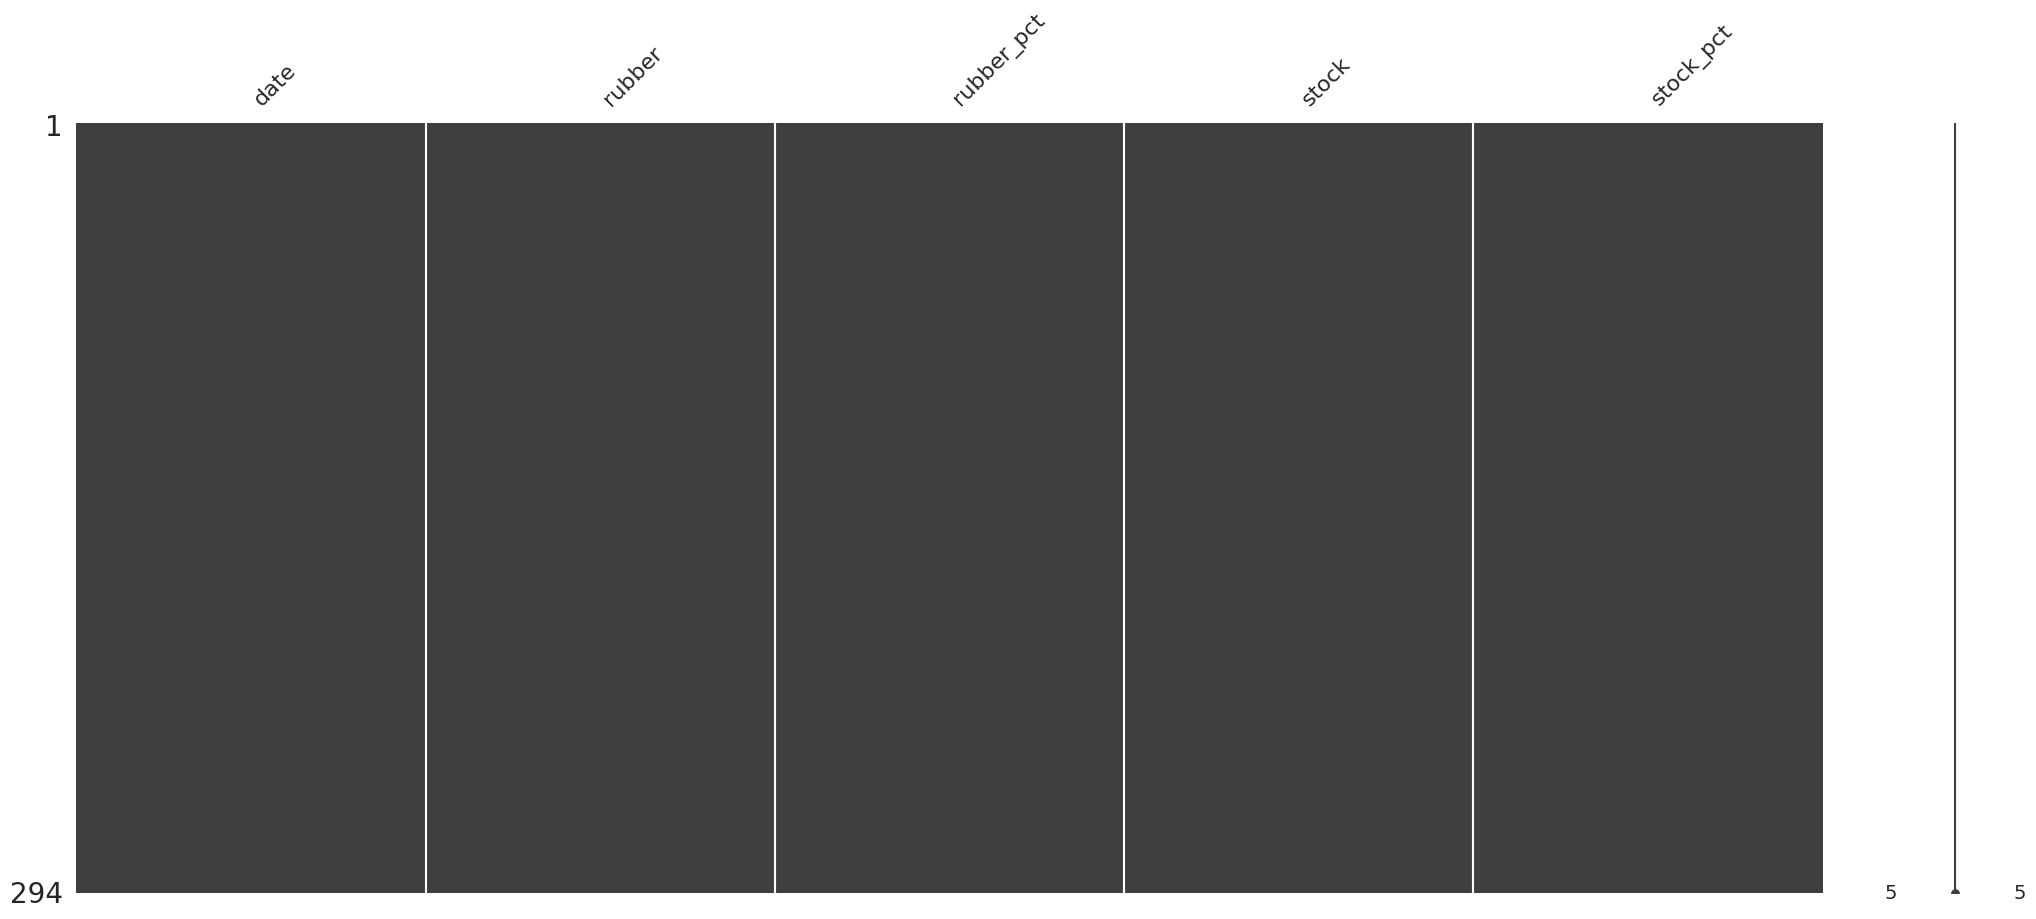

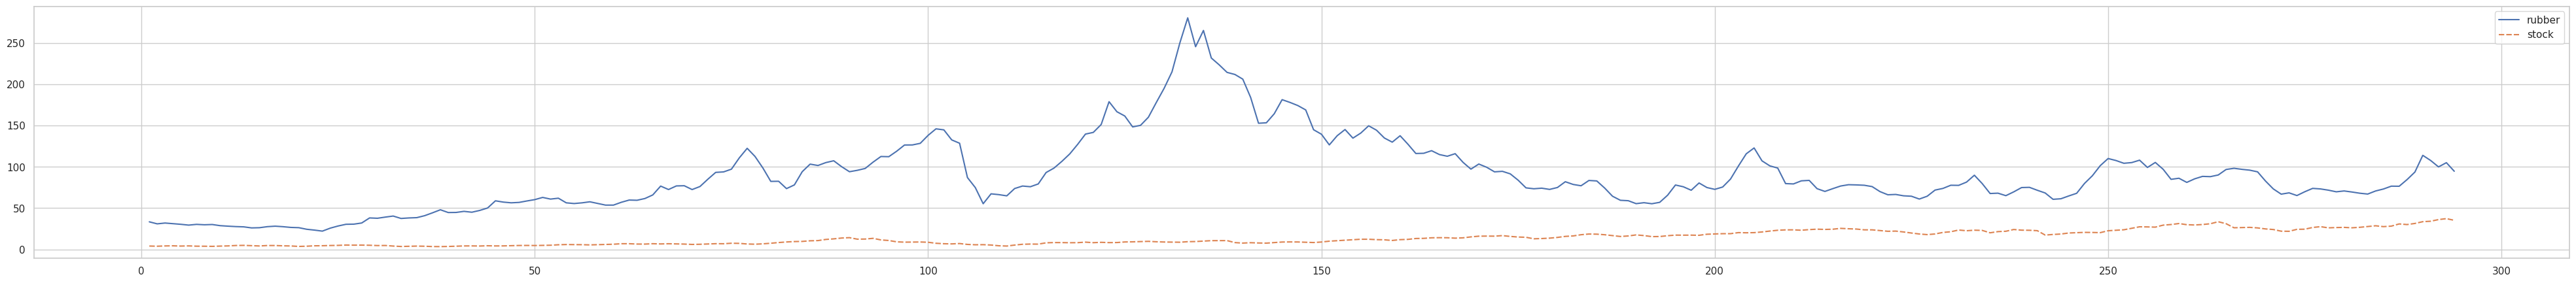

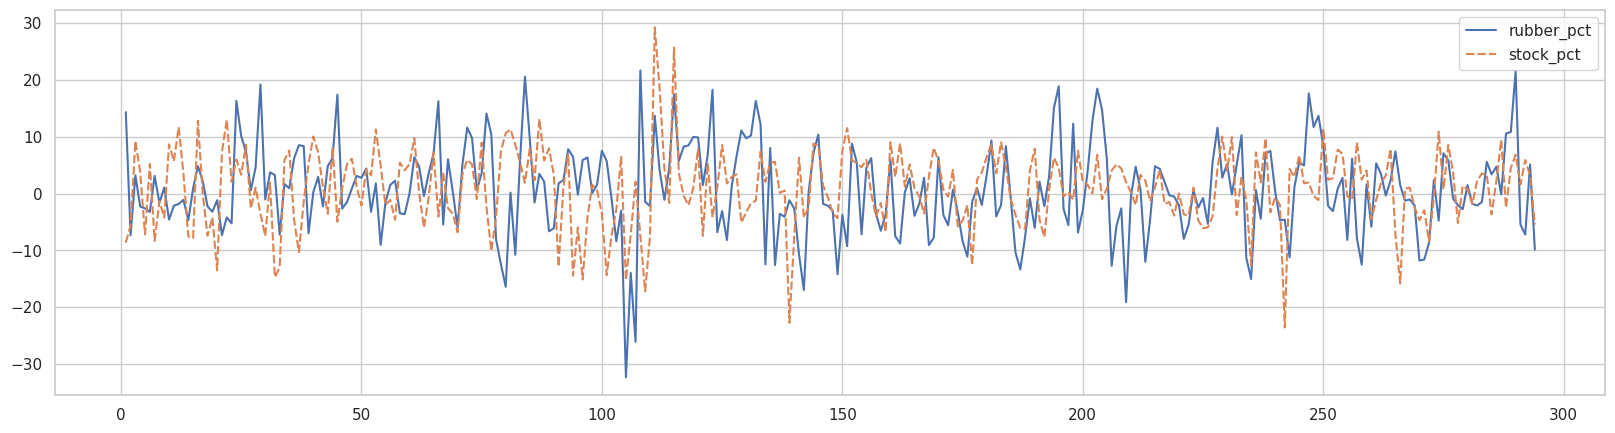

In [7]:
# MERGING
data = rubber.merge(stock, how='right', left_on="date", right_on="date").dropna()
print(data.shape)

if verbose:
    garden.debug_plot(data)
    garden.lineplot_large(data[['date', 'rubber', 'stock']], figsize=(50, 5))
    garden.lineplot_large(data[['date', 'rubber_pct', 'stock_pct']], figsize=(20, 5))


,date,rubber,rubber_pct,stock,stock_pct,stock_std,rubber_std
1,2000-02,33.391099,14.324155,4.026835,-8.649114,-1.146144,-1.244984
2,2000-03,30.941913,-7.334846,3.800950,-5.609498,-1.172360,-1.299581
3,2000-04,31.930148,3.193840,4.151925,9.233863,-1.131626,-1.277551
4,2000-05,31.201702,-2.281375,4.307571,3.748768,-1.113562,-1.293789
5,2000-06,30.386655,-2.612187,3.997019,-7.209445,-1.149604,-1.311958


<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 1 to 294
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   date        294 non-null    period[M]
 1   rubber      294 non-null    float64  
 2   rubber_pct  294 non-null    float64  
 3   stock       294 non-null    float64  
 4   stock_pct   294 non-null    float64  
 5   stock_std   294 non-null    float64  
 6   rubber_std  294 non-null    float64  
dtypes: float64(6), period[M](1)
memory usage: 18.4 KB


None

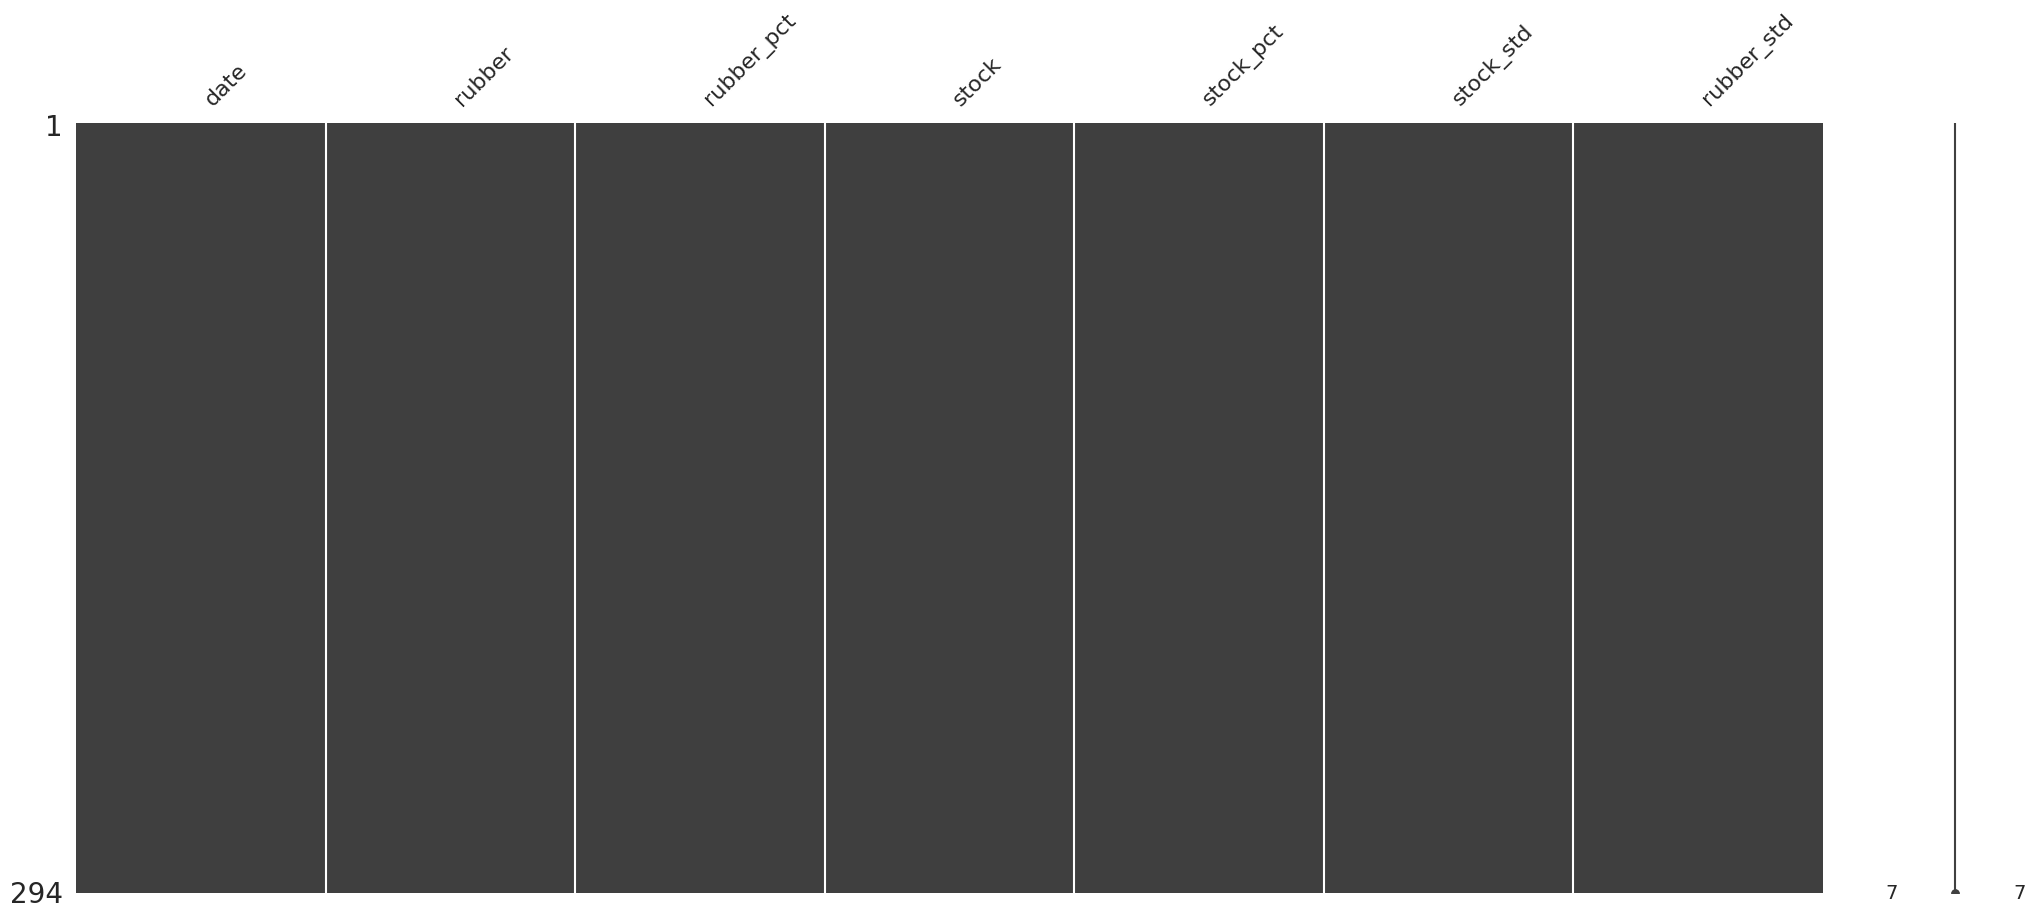

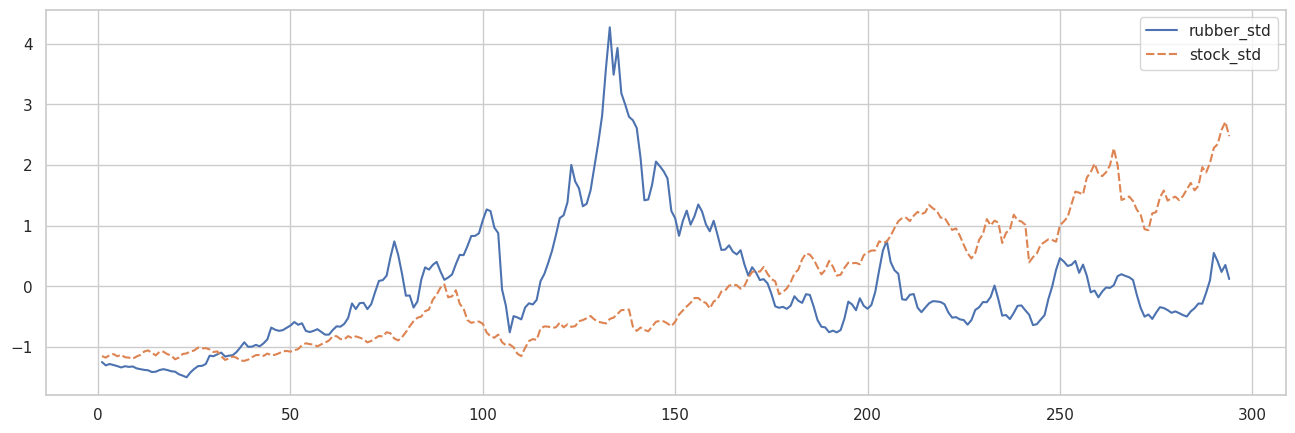

In [8]:
# Standardization of features
scaler = StandardScaler()

data['stock_std'] = scaler.fit_transform(data[['stock']])
data['rubber_std'] = scaler.fit_transform(data[['rubber']])

if verbose:
    garden.debug_plot(data)
    garden.lineplot_large(data[['date', 'rubber_std', 'stock_std']])

## <font color='#fce500'>Dynamic Conditional Correlations (DCC)</font>

The Dynamic Conditional Correlation (DCC) model is an advanced econometric technique used to estimate time-varying correlations between multiple time series. It was introduced by Robert Engle in 2002 and is an extension of the traditional GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model, which models time-varying volatility. The DCC model is particularly useful when we want to understand how the relationship between two or more time series evolves over time, which is often critical when studying contagion effects in various domains.

> <a href="https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity">Autoregressive Conditional Heteroskedasticity - Wikipedia</a>
> 
> <a href="https://www.investopedia.com/terms/g/garch.asp">GARCH Model: Definition and Uses in Statistics - Investopedia.com</a>

### <font color='#a4d65e'>How to interpret the results?</font>

Interpreting the results of a GARCH model involves understanding various statistical measures and coefficients. Here's a step-by-step guide to help you interpret these results:

#### 1. Optimization Process
- **Iterations:** The number of iterations the optimization algorithm took to converge to the best parameters.
- **Function Evaluations:** The number of times the objective function was evaluated.
- **Gradient Evaluations:** The number of times the gradient of the objective function was evaluated.
- **Negative Log-Likelihood Function (Neg. LLF):** Measures the goodness of fit of the model. Lower values indicate a better fit.

**Interpretation:**
- Check if the optimization terminated successfully.
- Ensure that the Neg. LLF stabilizes and does not change significantly in the last few iterations.

#### 2. Model Summary
- **Dependent Variable:** The variable being modeled (e.g., `stock_pct`, `rubber_pct`).
- **Mean Model:** The model used for the mean of the dependent variable (e.g., Constant Mean).
- **Volatility Model:** The model used for the volatility of the dependent variable (e.g., GARCH).
- **Distribution:** The assumed distribution of the residuals (e.g., Normal).
- **Log-Likelihood:** The log-likelihood value of the fitted model.
- **AIC (Akaike Information Criterion):** A measure of model fit that penalizes models with more parameters. Lower values indicate a better fit.
- **BIC (Bayesian Information Criterion):** Similar to AIC but penalizes models with more parameters more heavily. Lower values indicate a better fit.
- **Number of Observations:** The total number of data points used in the model.
- **Date and Time:** The date and time when the model was fitted.

**Interpretation:**
- Use the Log-Likelihood, AIC, and BIC to compare the fit of different models.
- Ensure that the number of observations is sufficient for reliable results.

#### 3. Mean Model
- **Coefficient (mu):** The constant mean of the dependent variable.
- **Standard Error:** The standard error of the coefficient.
- **t-statistic:** The t-statistic for testing the significance of the coefficient.
- **p-value:** The p-value for the t-test.
- **95% Confidence Interval:** The range within which the true value of the coefficient is likely to lie with 95% confidence.

**Interpretation:**
- Check if the coefficient is statistically significant (p-value < 0.05).
- Interpret the coefficient in the context of the dependent variable.
- Use the confidence interval to understand the uncertainty around the coefficient.

#### 4. Volatility Model
- **omega (constant term):** The baseline level of volatility.
- **alpha[1] (lagged squared residuals):** The coefficient for the lagged squared residuals, representing the short-term impact of past shocks on current volatility.
- **beta[1] (lagged conditional variance):** The coefficient for the lagged conditional variance, representing the persistence of volatility.
- **Standard Error, t-statistic, p-value, 95% Confidence Interval:** Similar to the mean model, these statistics help assess the significance and uncertainty of the coefficients.

**Interpretation:**
- Check if the coefficients are statistically significant (p-value < 0.05).
- Interpret the coefficients in the context of volatility:
  - `omega`: Baseline volatility.
  - `alpha[1]`: Short-term impact of past shocks.
  - `beta[1]`: Persistence of volatility.
- Use the confidence intervals to understand the uncertainty around the coefficients.

#### 5. Model Fit
- **R-squared:** The proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Adjusted R-squared:** Adjusts the R-squared value for the number of predictors in the model.

**Interpretation:**
- For a constant mean model, R-squared and Adjusted R-squared are expected to be zero, as the model does not include any explanatory variables.
- For models with explanatory variables, higher R-squared values indicate a better fit.

### <font color='#a4d65e'>Michelin stock volatility</font>

Iteration:      1,   Func. Count:      6,   Neg. LLF: 518263552.77435464
Iteration:      2,   Func. Count:     12,   Neg. LLF: 109081424677.11621
Iteration:      3,   Func. Count:     19,   Neg. LLF: 659869256.8413411
Iteration:      4,   Func. Count:     26,   Neg. LLF: 982.0572698997426
Iteration:      5,   Func. Count:     32,   Neg. LLF: 890.2001010250447
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1668.3515591027708
Iteration:      7,   Func. Count:     47,   Neg. LLF: 19953.879345994435
Iteration:      8,   Func. Count:     54,   Neg. LLF: 891.6125082805343
Iteration:      9,   Func. Count:     60,   Neg. LLF: 892.0147570473911
Iteration:     10,   Func. Count:     66,   Neg. LLF: 885.0548369788264
Iteration:     11,   Func. Count:     72,   Neg. LLF: 877.1880217112426
Iteration:     12,   Func. Count:     77,   Neg. LLF: 876.3081982556711
Iteration:     13,   Func. Count:     82,   Neg. LLF: 876.1666564889586
Iteration:     14,   Func. Count:     88,   Neg. LLF: 875.71

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  stock   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -874.405
Distribution:                  Normal   AIC:                           1756.81
Method:            Maximum Likelihood   BIC:                           1771.54
                                        No. Observations:                  294
Date:                Wed, Sep 04 2024   Df Residuals:                      293
Time:                        14:54:31   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             8.3499      0.190     43.932      0.000 [  7.977,  8.722]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2150  7.011e-02      3.067  2.164e-03    [7.760e-02,  0.352]
alpha[1]       0.9932  2.845e-02     34.912 4.819e-267      [  0.937,  1.049]
beta[1]    6.7607e-03  2.472e-02      0.273      0.784 [-4.169e-02,5.521e-02]
=============================================================================

Covariance estimator: robust
"""

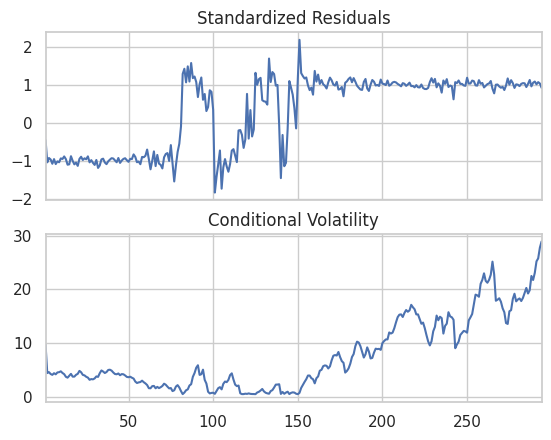

In [53]:
# Michelin stock volatility dynamic modeling
stock_model = arch_model(data['stock']).fit()
data['stock_volatility'] = stock_model.conditional_volatility
data['stock_std_resid'] = stock_model.std_resid


if verbose:
    display(stock_model.summary())
    stock_model.plot()

<u>**RESULTS (04/09/2024):**</u>

The GARCH(1,1) model provides a reasonable fit for the volatility of the stock price. The mean model suggests a significant constant mean, while the volatility model indicates that past squared residuals (alpha) have a strong influence on current volatility. However, the baseline volatility (omega) and the influence of past volatility (beta) are not statistically significant, <u>suggesting that the volatility is primarily driven by its own past values</u>. The model's AIC and BIC values can be used to compare this model with other potential models for the same data.

### <font color='#a4d65e'>Rubber price index volatility</font>

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8248.86552023702
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1402.5452306319917
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1361.806790863936
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1322.3226961471578
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1321.986464930979
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1321.7986826630108
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1321.7719736499616
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1321.6046102092434
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1321.2723782397877
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1321.0655013339979
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1320.9792456857654
Iteration:     12,   Func. Count:     64,   Neg. LLF: 1320.9601486937086
Iteration:     13,   Func. Count:     69,   Neg. LLF: 1320.9421620927428
Iteration:     14,   Func. Count:     74,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 rubber   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1320.86
Distribution:                  Normal   AIC:                           2649.71
Method:            Maximum Likelihood   BIC:                           2664.45
                                        No. Observations:                  294
Date:                Thu, Sep 05 2024   Df Residuals:                      293
Time:                        07:25:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            72.8157      1.677     43.423      0.000 [ 69.529, 76.102]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         26.6033      9.184      2.897  3.772e-03      [  8.602, 44.604]
alpha[1]       1.0000  5.892e-02     16.974  1.289e-64      [  0.885,  1.115]
beta[1]        0.0000  3.534e-02      0.000      1.000 [-6.926e-02,6.926e-02]
=============================================================================

Covariance estimator: robust
"""

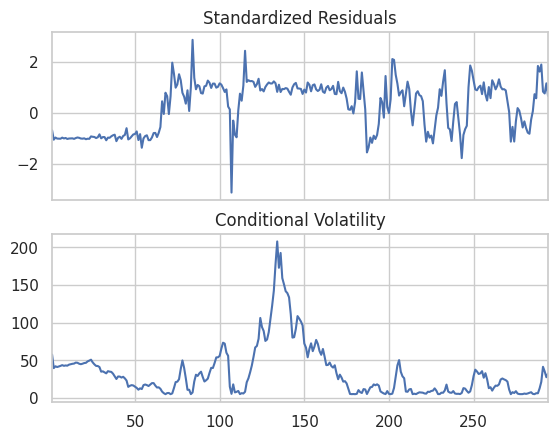

In [9]:
# Rubber price index volatility dynamic modeling
rubber_model = arch_model(data['rubber']).fit()
data['ruber_volatility'] = rubber_model.conditional_volatility
data['ruber_std_resid'] = rubber_model.std_resid

if verbose:
    display(rubber_model.summary())
    rubber_model.plot()

<u>**RESULTS (04/09/2024):**</u>

The GARCH(1,1) model provides a reasonable fit for the volatility of the rubber index. The mean model suggests a significant constant mean, while the volatility model indicates that past squared residuals (alpha) have a strong influence on current volatility. However, the baseline volatility (omega) and the influence of past volatility (beta) are not statistically significant, <u>suggesting that the volatility is primarily driven by its own past values</u>. The model's AIC and BIC values can be used to compare this model with other potential models for the same data.

<u>**Own interpretation**</u>: We can add that the AIC value of the rubber price modeling is well above the one for the stock prices modeling, <u>suggesting that the rubber price may not be the best to use to study the contagion between the two indexes</u>.

## <font color='#fce500'>Time-Varying Granger Causality (TVGC)</font>
After obtaining the dynamic correlations, apply a Time-Varying Granger Causality (TVGC) test to determine the causal relationship between the two time series over time. This will help in identifying periods when one series Granger-causes the other.

Time-Varying Granger Causality (TVGC) is an extension of the traditional Granger causality test, which is used to analyze the dynamic causal relationships between time series. Unlike the standard Granger causality test, which assumes that the causal relationship between time series is constant over time, TVGC allows these relationships to evolve and change over time.

> <a href="https://ageconsearch.umn.edu/record/340455/files/Baum.pdf">Testing for time-varying Granger causality - Christopher F. Baum, 2022</a>

Let's first have a look at the standardized residuals from the GARCH models. We will use it to look for potential Granger causes between various periods of high volatility.

In [65]:
t = pd.DataFrame(scaler.fit_transform(data[['ruber_std_resid', 'stock_std_resid']]))

,date,rubber,rubber_pct,stock,stock_pct,stock_std,rubber_std,stock_volatility,stock_std_resid,ruber_volatility,ruber_std_resid
1,2000-02,33.391099,14.324155,4.026835,-8.649114,-1.146144,-1.244984,9.677355,-0.446722,57.774933,-0.682383
2,2000-03,30.941913,-7.334846,3.800950,-5.609498,-1.172360,-1.299581,4.405783,-1.032501,39.760598,-1.053149
3,2000-04,31.930148,3.193840,4.151925,9.233863,-1.131626,-1.277551,4.571600,-0.918278,42.190285,-0.969076
4,2000-05,31.201702,-2.281375,4.307571,3.748768,-1.113562,-1.293789,4.226154,-0.956509,41.209640,-1.009813
5,2000-06,30.386655,-2.612187,3.997019,-7.209445,-1.149604,-1.311958,4.070126,-1.069477,41.932457,-1.011843


<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 1 to 294
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   date              294 non-null    period[M]
 1   rubber            294 non-null    float64  
 2   rubber_pct        294 non-null    float64  
 3   stock             294 non-null    float64  
 4   stock_pct         294 non-null    float64  
 5   stock_std         294 non-null    float64  
 6   rubber_std        294 non-null    float64  
 7   stock_volatility  294 non-null    float64  
 8   stock_std_resid   294 non-null    float64  
 9   ruber_volatility  294 non-null    float64  
 10  ruber_std_resid   294 non-null    float64  
dtypes: float64(10), period[M](1)
memory usage: 27.6 KB


None

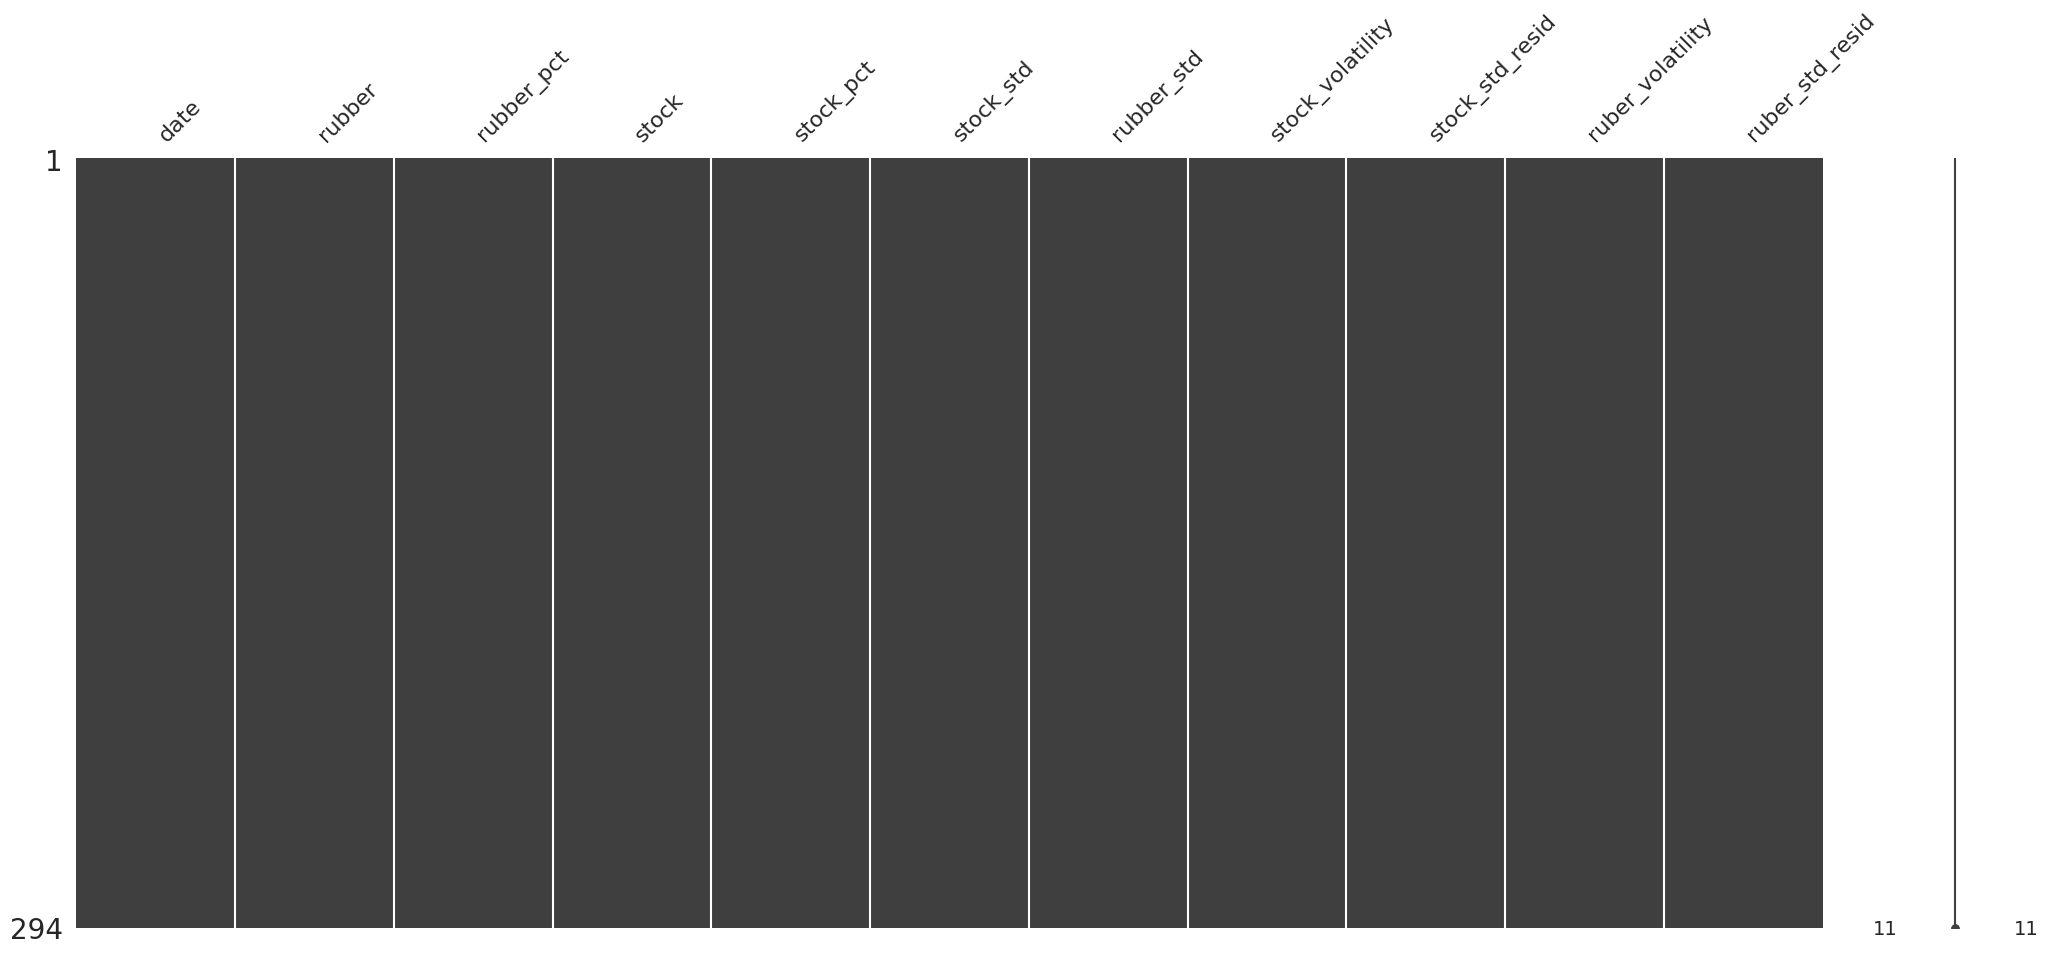

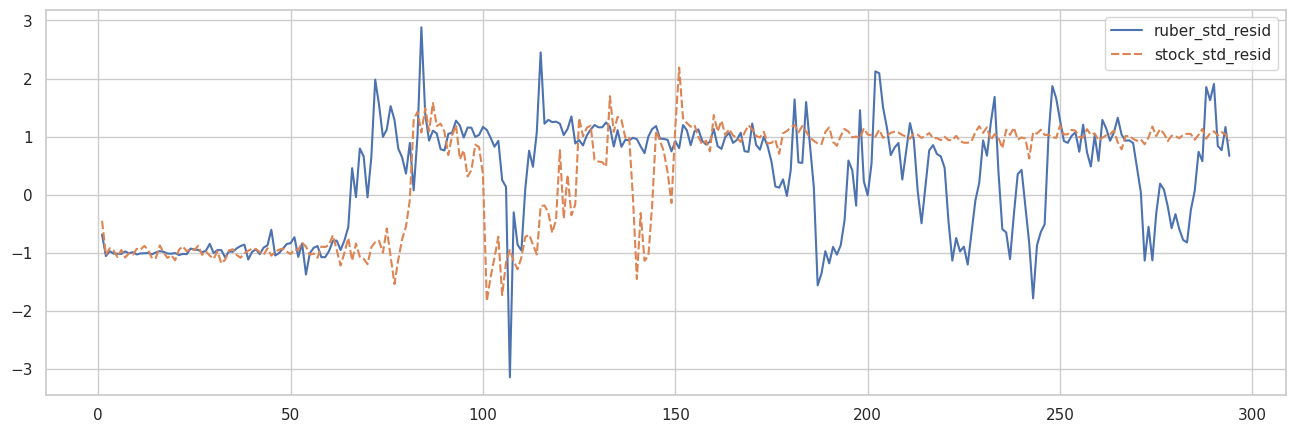

In [60]:
garden.debug_plot(data)
garden.lineplot_large(data[['ruber_std_resid', 'stock_std_resid']])

### <font color='#a4d65e'>Rolling windowing</font>

In this method, the windows on which the Granger test is computed are defined by intervals of fixed size from the start to the end of the period.

In [74]:
window_size = 3 # Windowing by quarters
windows = int((len(data) / window_size) - (len(data) % window_size)) # Number of windows to go through, excluding potential uncomplete last window

# Iterative Granger test
for window in data.iloc

In [75]:
windows

98.0

In [68]:
len(data)

294